In [1]:
from math import pi
import numpy as np
from matplotlib import pyplot as plt

# Plotagem lateral: Porsche

Plotagem do perfil lateral de um veículo automotor pertencente
a um modelo comercializado no mercado de automóveis. Nesse exemplo, será utilizado um porsche. 

A plotagem irá utilizar:
- Curvas de Bézier;
- Equação vetorial da reta;
- Funções matemáticas definidas;

## Equações vetoriais

In [2]:
def plot_circle(
    center,
    radius,
    start_circle=0,
    end_circle=40,
    number_of_points=100,
    color_circle='black',
):
    plt.plot(
        [
            center[0] + radius * np.sin(np.pi / number_of_points * 2 * xy)
            for xy in range(
                int(number_of_points * start_circle / 40),
                int((number_of_points + 1) * end_circle / 40),
            )
        ],
        [
            center[1] + radius * np.cos(np.pi / number_of_points * 2 * xy)
            for xy in range(
                int(number_of_points * start_circle / 40),
                int((number_of_points + 1) * end_circle / 40),
            )
        ],
        color=color_circle,
    )

In [3]:
# equação vetorial da reta
def equaçao_reta(p0, p1, u=1, color_reta='black'):
    x = p0[0] + u * (p1[0] - p0[0])
    y = p0[1] + u * (p1[1] - p0[1])
    plt.plot([p0[0], x], [p0[1], y], color=color_reta)

In [4]:
def elipse(x, y, l, a):
    t = np.linspace(0, 2 * pi, 100)
    plt.plot(x + l * np.cos(t), y + a * np.sin(t), color='black')

## Curvas de Bézier

### Curvas de Bézier lineares

$${\displaystyle \mathbf {B}(t) = \mathbf {P} _{0}+t(\mathbf {P} _{1}-\mathbf {P} _{0})}$$
$$\mathbf {B} (t) = (1-t)\mathbf {P} _{0}+t\mathbf {P} _{1}$$
$$0\leq t\leq 1$$

In [5]:
quad_binomial = (
    lambda t, ip, cp, fp, n: (1 - t / n) ** 2 * ip
        + 2 * t / n * (1 - t / n) * cp
        + (t / n) ** 2 * fp
)

In [6]:
cubic_binomial = (
    lambda t, ip, cp0, cp1, fp, n: (1 - t / n) ** 3 * ip
        + 3 * t / n * (1 - t / n) ** 2 * cp0
        + 3 * (t / n) ** 2 * (1 - t / n) * cp1
        + (t / n) ** 3 * fp
)

In [7]:
def bezier_3(
    initial_point, 
    control_point, 
    final_point, 
    n=100, 
    check=False, 
    color_bezier='black'
):
    plt.plot(
        [
            quad_binomial(t, initial_point[0], control_point[0], final_point[0], n)
            for t in range(n + 1)
        ],
        [
            quad_binomial(t, initial_point[1], control_point[1], final_point[1], n)
            for t in range(n + 1)
        ],
        color=color_bezier,
    )

    if check:
        plt.plot(
            (initial_point[0], control_point[0], final_point[0]),
            (initial_point[1], control_point[1], final_point[1]),
            color='black',
            alpha=0.2,
        )
        
        plt.scatter(control_point[0], control_point[1], color='r')

In [8]:
def bezier_4(
    initial_point,
    control_point_0,
    control_point_1,
    final_point,
    n=100,
    check=False,
    color_bezier='black',
):
    plt.plot(
        [
            cubic_binomial(
                t,
                initial_point[0],
                control_point_0[0],
                control_point_1[0],
                final_point[0],
                n,
            )
            for t in range(n + 1)
        ],
        [
            cubic_binomial(
                t,
                initial_point[1],
                control_point_0[1],
                control_point_1[1],
                final_point[1],
                n,
            )
            for t in range(n + 1)
        ],
        color=color_bezier,
    )

    if check:
        plt.plot(
            (initial_point[0], control_point_0[0], control_point_1[0], final_point[0]),
            (initial_point[1], control_point_0[1], control_point_1[1], final_point[1]),
            color='black',
            alpha=0.2,
        )
        
        plt.scatter(control_point_0[0], control_point_0[1], color='r')
        plt.scatter(control_point_1[0], control_point_1[1], color='r')

## Plotagem das partes do carro

In [9]:
def configuracoes():
    fig = plt.figure(figsize=(14,5))
    plt.xlim(0, 1552)
    plt.ylim(0, 554)
    plt.grid()

In [10]:
def contorno_externo():
    seg1 = [
        (172, 461),
        (75, 450),
        (38, 377),
        (49, 366),
        (48, 287),
        (75, 255),
        (60, 240),
        (105, 240),
    ]
    
    seg3 = [
        (1515, 342),
        (1515, 373),
        (1500, 388),
        (1500, 438),
        (1515, 450),
        (1503, 465),
        (1457, 467),
        (1362, 485),
        (1326, 485),
    ]

    parte_de_baixo = [
        (454, 453), 
        (454, 506), 
        (493, 486), 
        (1063, 488), 
        (1058, 410)
    ]

    bezier_3((105, 554 - 240), (550, 490), (757, 554 - 88))
    bezier_3((757, 554 - 88), (830, 470), (1048, 554 - 202))
    bezier_4((976, 554 - 220), (1150, 554 - 245), (1300, 554 - 210), (1418, 554 - 294))
    bezier_3((1048, 352), (1100, 345), (1166, 322))
    bezier_3((1418, 554 - 294), (1455, 554 - 300), (1515, 554 - 342))

    plt.plot([p[0] for p in seg1], [554 - p[1] for p in seg1], color='black')
    plt.plot([p[0] for p in seg3], [554 - p[1] for p in seg3], color='black')

    plt.plot(
        [p[0] for p in parte_de_baixo], [554 - p[1] for p in parte_de_baixo], color='black'
    )

In [11]:
def plot_calota(center, minor_radius, major_radius):
    plt.plot(
        (
            [
                center[0] + minor_radius * np.sin(np.pi / 10 * 2 * xy)
                for xy in range(10)
            ],
            [
                center[0] + major_radius * np.sin(np.pi / 10 * 2 * xy)
                for xy in range(10)
            ],
        ),
        (
            [
                center[1] + minor_radius * np.cos(np.pi / 10 * 2 * xy)
                for xy in range(10)
            ],
            [
                center[1] + major_radius * np.cos(np.pi / 10 * 2 * xy)
                for xy in range(10)
            ],
        ),
        color='black',
    )

In [12]:
def rodas():
    # roda esquerda
    plot_circle([314, 554-416], 145, end_circle=12)
    plot_circle([314, 554-416], 145, start_circle=28)
    plot_circle([314, 554-416], 128)
    plot_circle([314, 554-416], 115)
    plot_circle([314, 554-416], 24)
    plot_circle([314, 554-416], 11)
    plot_calota([314, 554-416], 25, 114)

    # roda direita
    plot_circle([1203, 554-416], 145, end_circle=13.6)
    plot_circle([1203, 554-416], 145, start_circle=30)
    plot_circle([1203, 554-416], 128)
    plot_circle([1203, 554-416], 115)
    plot_circle([1203, 554-416], 24)
    plot_circle([1203, 554-416], 11)
    plot_calota([1203, 554-416], 25, 114)

In [13]:
def contorno_interno():
    seg1 = [(1060, 460),(480, 460)]
    seg2 = [(1060, 430),(700, 430)]
    seg3 = [(1060, 420),(710, 420)]
    seg4 = [(1045, 420),(1045, 280)]
    seg5 = [(1515, 347),(1385, 350)]
    seg6 = [(1515, 370),(1445, 370)]
    seg7 = [(1515, 450),(1445, 450)]
    seg8 = [(1345, 450),(1445, 450)]
    seg9 = [(1500, 440),(1455, 440)]
    seg10 = [(1500, 425),(1455, 425)]
    seg11 = [(1500, 410),(1455, 410)]
    seg12 = [(1500, 390),(1455, 390)]
    seg13 = [(50, 365),(175, 365)]

    plt.plot([p[0] for p in seg1], [554-p[1] for p in seg1], color='black')
    plt.plot([p[0] for p in seg2], [554-p[1] for p in seg2], color='black')
    plt.plot([p[0] for p in seg3], [554-p[1] for p in seg3], color='black')
    plt.plot([p[0] for p in seg4], [554-p[1] for p in seg4], color='black')
    plt.plot([p[0] for p in seg5], [554-p[1] for p in seg5], color='black')
    plt.plot([p[0] for p in seg6], [554-p[1] for p in seg6], color='black')
    plt.plot([p[0] for p in seg7], [554-p[1] for p in seg7], color='black')
    plt.plot([p[0] for p in seg8], [554-p[1] for p in seg8], color='black')
    plt.plot([p[0] for p in seg9], [554-p[1] for p in seg9], color='black')
    plt.plot([p[0] for p in seg10], [554-p[1] for p in seg10], color='black')
    plt.plot([p[0] for p in seg11], [554-p[1] for p in seg11], color='black')
    plt.plot([p[0] for p in seg12], [554-p[1] for p in seg12], color='black')
    plt.plot([p[0] for p in seg13], [554-p[1] for p in seg13], color='black')
    
    bezier_3((700, 125),(550, 130),(580, 290))
    bezier_3((710, 135),(630, 165),(630, 300))
    bezier_3((485, 100),(500, 210),(440, 260))
    bezier_3((405, 250),(510, 290),(640, 300))
    bezier_3((640, 300),(950, 300),(1130, 263))     
    bezier_3((1385, 205),(1340, 210),(1300, 245))
    bezier_3((1445, 183),(1400, 150),(1445, 105))
    
    # linha do espelho retrovisor e pequena parte do vidro
    elipse(850, 360, 50, 20)
    equaçao_reta([805, 554-186], [895, 554-188])
    equaçao_reta([880, 554-210], [905, 554-210])
    equaçao_reta([905, 554-210], [895, 554-205])

    # farol dianteiro
    bezier_3((1270, 315),(1300, 250),(1410, 265))
    bezier_3((1325, 300),(1350, 270),(1395, 275))

    # farol traseiro
    segd = [
        (104, 288),
        (157, 288),
        (209, 256),
        (170, 240),
        (105, 240),
        (85, 265),
        (104, 288)
    ]
    
    plt.plot([p[0] for p in segd], [554-p[1] for p in segd], color='black')
    
    # vidro dianteiro
    bezier_3((1048, 352),(1030, 350),(976, 554-220))
    bezier_3((976, 554-220),(945, 340),(786, 554-115))
    bezier_3((786, 554-115),(795, 554-107),(808, 554-97))
    
    # vidro lateral
    sega = [(227, 210), (820, 210)]
    segb = [(574, 209), (544, 117)]
    segc = [(588, 210), (558, 118)]

    plt.plot([p[0] for p in sega], [554-p[1] for p in sega], color='black')
    plt.plot([p[0] for p in segb], [554-p[1] for p in segb], color='black')
    plt.plot([p[0] for p in segc], [554-p[1] for p in segc], color='black')
    
    bezier_3((227, 554-210),(400, 405),(544, 554-117))
    bezier_3((544, 554-117),(725, 480),(854, 554-173))

## Plotagem do carro

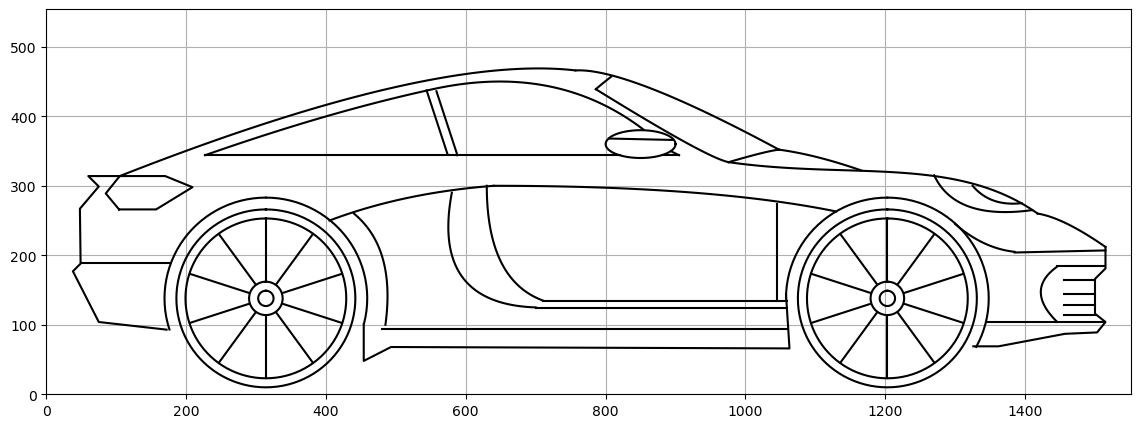

In [14]:
configuracoes()
contorno_externo()
contorno_interno()
rodas()

plt.show()